## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [1]:
import pandas as pd

In [116]:
df=pd.read_csv("bigcity-1.csv",index_col=0)
df.head()
df
df.corr()

u         x
u  1.000000  0.981742
x  0.981742  1.000000

The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [13]:
df.shape

(49, 2)

In [26]:
x_ind=df[["u"]]

In [27]:
y_dep=df[["x"]]

In [17]:
from sklearn.model_selection import train_test_split

In [29]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.25, random_state=1)

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [30]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for u is 1.1575853103579854


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

In [32]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 11.715650887489772


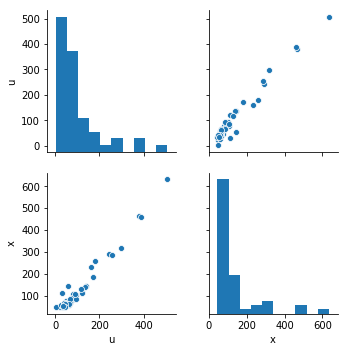

In [39]:
import seaborn as sns
sns.pairplot(df)

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [36]:
regression_model.score(X_test, y_test)

0.8939772697202851

## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [37]:
#The model is performing with 97% accuracy in training data
regression_model.score(X_train, y_train)

0.9706700661995299

In [38]:
#The model is performing with 89% accuracy with the test data
regression_model.score(X_test, y_test)

0.8939772697202851

# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [40]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [163]:
prima_df=pd.read_csv("pima-indians-diabetes.csv")
prima_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
18             1      103             30             38       83  43.3   
19             1      115             70             30       96  34.6   
20             3      126             88             41      235  39.3   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
23             9      119             80             35        0  29.0   
24            11      143             94             33      146  36.6   
25            10      125             70             26      115  31.1   
26             7      147             76              0        0  39.4   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
29             5      117             92              0        0  34.1   
..           ...      ...            ...            ...      ...   ...   
738            2       99             60             17      160  36.6   
739            1      102             74              0        0  39.5   
740           11      120             80             37      150  42.3   
741            3      102             44             20       94  30.8   
742            1      109             58             18      116  28.5   
743            9      140             94              0        0  32.7   
744           13      153             88             37      140  40.6   
745           12      100             84             33      105  30.0   
746            1      147             94             41        0  49.3   
747            1       81             74             41       57  46.3   
748            3      187             70             22      200  36.4   
749            6      162             62              0        0  24.3   
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   
755            1      128             88             39      110  36.5   
756            7      137             90             41        0  32.0   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760      

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [45]:
prima_df.shape

(768, 9)

In [46]:
prima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [52]:
glucose_med = prima_df["Glucose"].median(skipna=True)   # find the median of the plasma column among the inliers
print (glucose_med)

prima_df["Glucose"]=prima_df["Glucose"].replace({'Glucose': {0: glucose_med}})    # replace the 0 plasma values in the original data with the median of plasma
print (prima_df["Glucose"])


117.0
0      148
1       85
2      183
3       89
4      137
5      116
6       78
7      115
8      197
9      125
10     110
11     168
12     139
13     189
14     166
15     100
16     118
17     107
18     103
19     115
20     126
21      99
22     196
23     119
24     143
25     125
26     147
27      97
28     145
29     117
      ... 
738     99
739    102
740    120
741    102
742    109
743    140
744    153
745    100
746    147
747     81
748    187
749    162
750    136
751    121
752    108
753    181
754    154
755    128
756    137
757    123
758    106
759    190
760     88
761    170
762     89
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


In [53]:
BloodPressure_med = prima_df["BloodPressure"].median(skipna=True)  
print (glucose_med)

prima_df["Glucose"]=prima_df["BloodPressure"].replace({'BloodPressure': {0: BloodPressure_med}})    

117.0
0      72
1      66
2      64
3      66
4      40
5      74
6      50
7       0
8      70
9      96
10     92
11     74
12     80
13     60
14     72
15      0
16     84
17     74
18     30
19     70
20     88
21     84
22     90
23     80
24     94
25     70
26     76
27     66
28     82
29     92
       ..
738    60
739    74
740    80
741    44
742    58
743    94
744    88
745    84
746    94
747    74
748    70
749    62
750    70
751    78
752    62
753    88
754    78
755    88
756    90
757    72
758    76
759    92
760    58
761    74
762    62
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64


In [54]:
Insulin_med = prima_df["Insulin"].median(skipna=True)

prima_df["Insulin"]=prima_df["Insulin"].replace({'Insulin': {0: Insulin_med}})    
print (prima_df["Insulin"])

117.0
0        0
1        0
2        0
3       94
4      168
5        0
6       88
7        0
8      543
9        0
10       0
11       0
12       0
13     846
14     175
15       0
16     230
17       0
18      83
19      96
20     235
21       0
22       0
23       0
24     146
25     115
26       0
27     140
28     110
29       0
      ... 
738    160
739      0
740    150
741     94
742    116
743      0
744    140
745    105
746      0
747     57
748    200
749      0
750      0
751     74
752      0
753    510
754      0
755    110
756      0
757      0
758      0
759      0
760     16
761      0
762      0
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64


In [55]:
BMI_med = prima_df["BMI"].median(skipna=True)

prima_df["BMI"]=prima_df["BMI"].replace({'BMI': {0: BMI_med}})    
print (prima_df["BMI"])

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
5      25.6
6      31.0
7      35.3
8      30.5
9       0.0
10     37.6
11     38.0
12     27.1
13     30.1
14     25.8
15     30.0
16     45.8
17     29.6
18     43.3
19     34.6
20     39.3
21     35.4
22     39.8
23     29.0
24     36.6
25     31.1
26     39.4
27     23.2
28     22.2
29     34.1
       ... 
738    36.6
739    39.5
740    42.3
741    30.8
742    28.5
743    32.7
744    40.6
745    30.0
746    49.3
747    46.3
748    36.4
749    24.3
750    31.2
751    39.0
752    26.0
753    43.3
754    32.4
755    36.5
756    32.0
757    36.3
758    37.5
759    35.5
760    28.4
761    44.0
762    22.5
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rachi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


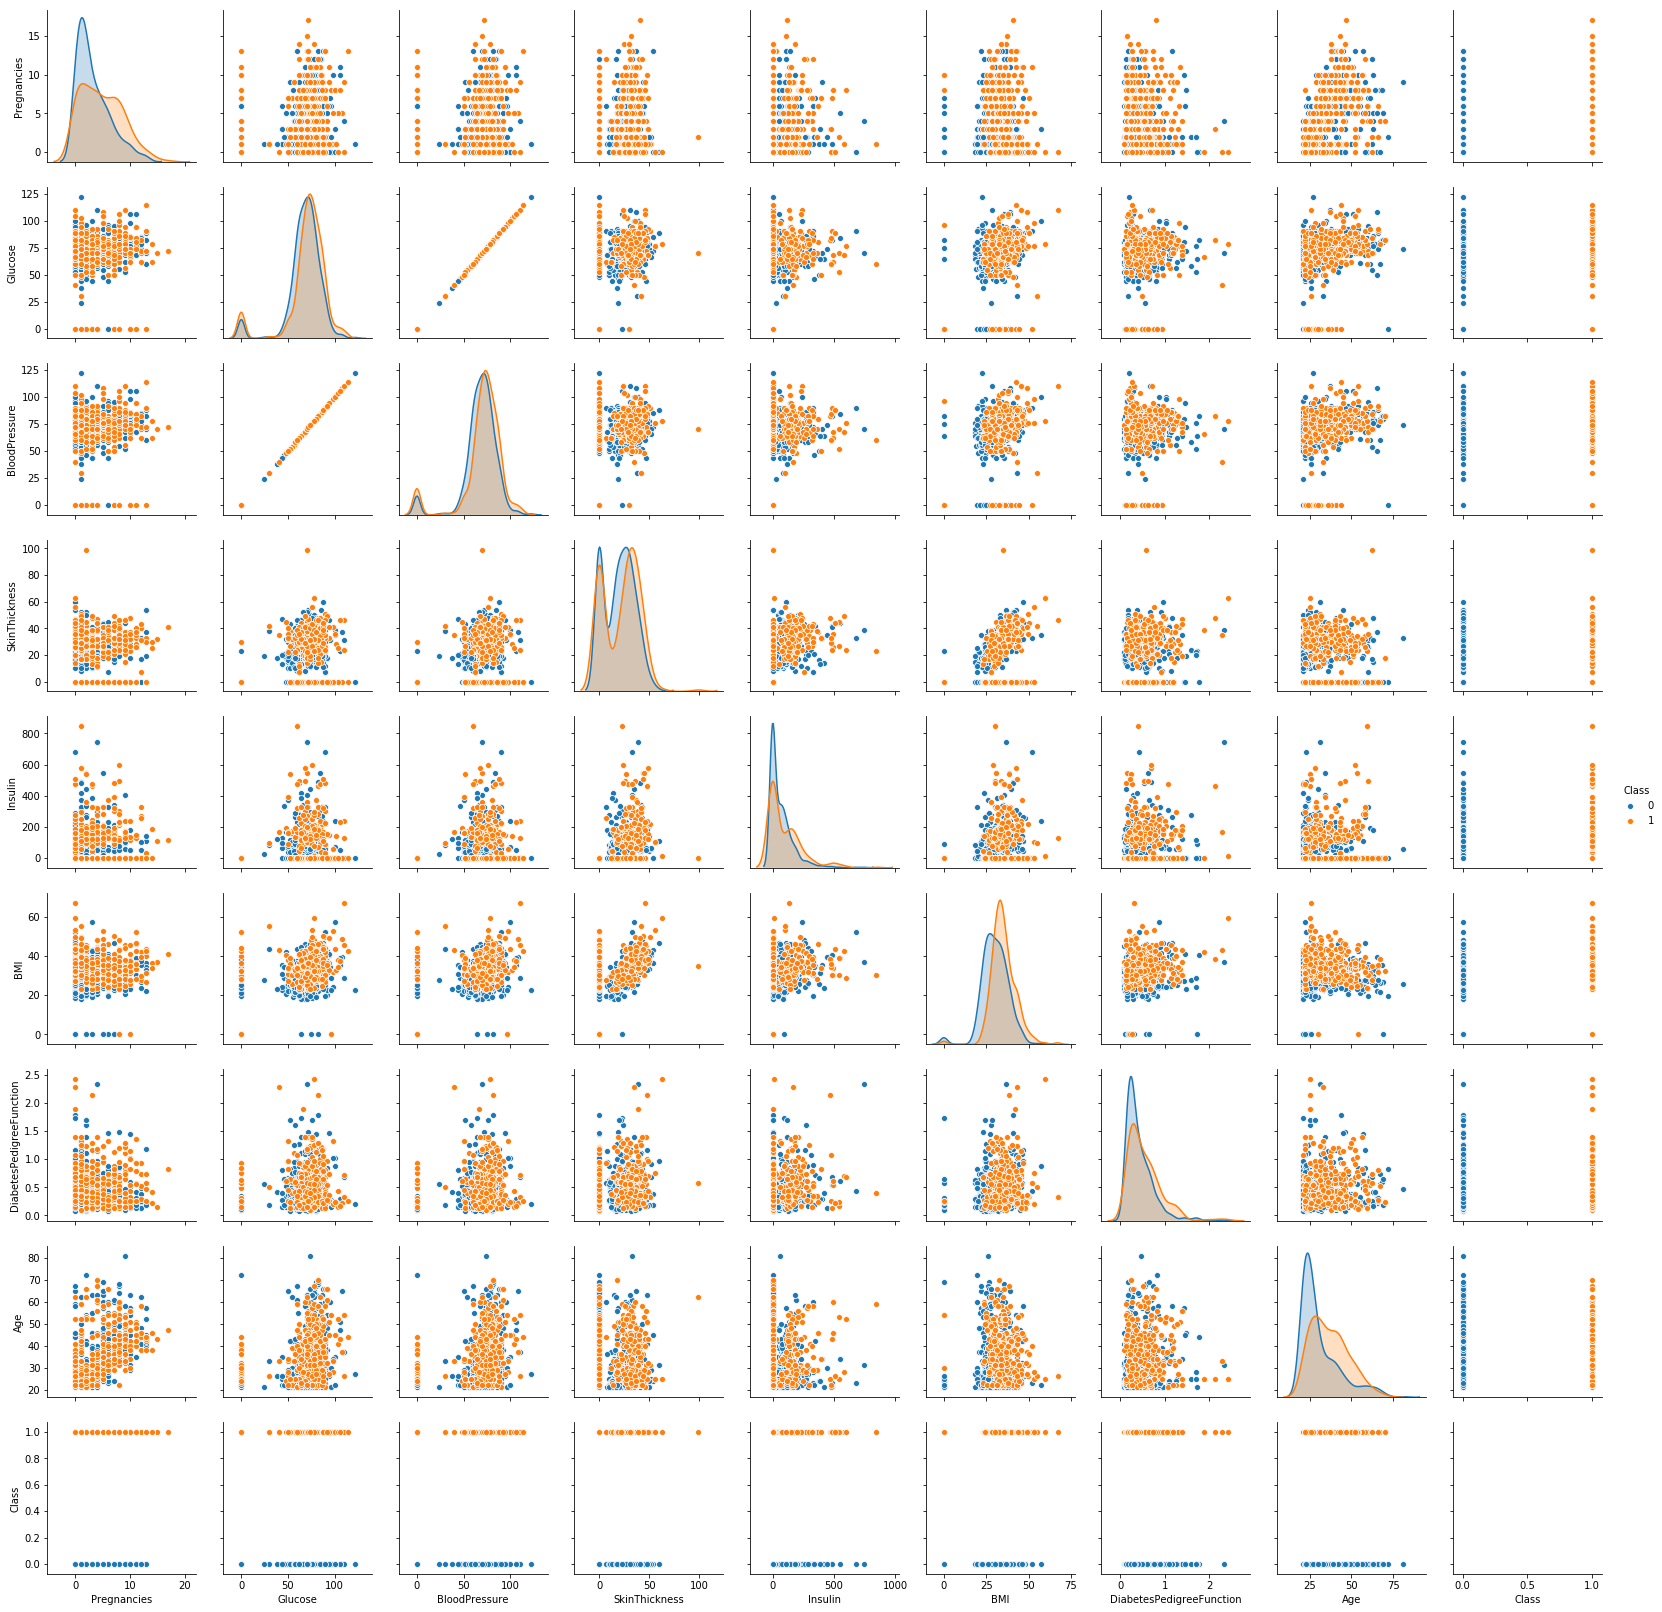

In [59]:
import seaborn as sns
sns.pairplot(prima_df,diag_kind='kde',hue='Class')

In [ ]:
#Pregnancies:I see that it is a Gaussian Distribution, no major outliers are observed in this data, the two classes are having the overlapping central tendencies
#Glucose: I observe that there are some outliers in the dataset, as I see a cluttered Gaussian on the left on the major Gaussian
#BloodPressure:  I observe that there are some outliers in the dataset, as I see a cluttered Gaussian on the left on the major Gaussian
#Skin Thickness: Has two major Gaussians and on the top of that both the classes have central tendencies
#overlapping each other
#The other variables like Insulin and the left over variables, also follow the same trend
#The Observation that I have is that even before I start building on a model, it would 
#be very difficult to a do a classification problem on this dataset as the classes are more packed to each other


## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [62]:
X=prima_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y=prima_df['Class']

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [65]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [67]:
ypred=model.predict(xtest)

In [68]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.6233766233766234


Print the feature importance of the decision model - Optional

In [69]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[114  43]
 [ 44  30]]


In [70]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
ypred2=model2.predict(xtest)

In [72]:
acc2=metrics.accuracy_score(ytest,ypred2)
print(acc2)

0.6623376623376623


In [73]:
cm2=metrics.confusion_matrix(ytest,ypred2)
print(cm2)

[[110  47]
 [ 31  43]]


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [77]:
Rf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
y_predict_Rf=Rf_model.predict(xtest)

In [79]:
Rf_acc=metrics.accuracy_score(ytest,y_predict_Rf)
print(Rf_acc)

0.7142857142857143


## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [189]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=model2,n_estimators= 51)
abcl.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [196]:
y_pred_boost=abcl.predict(xtest)

In [197]:
metrics.accuracy_score(ytest,y_pred_boost)

0.7316017316017316

## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [183]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=model2,n_estimators=51)
bgcl.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [191]:
ypred3= bgcl.predict(xtest)

In [192]:
acc=metrics.accuracy_score(ytest,ypred3)
acc*100

70.12987012987013

## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [199]:
y_predict_gb=gbcl.predict(xtest)


In [200]:
metrics.accuracy_score(ytest,y_predict_gb)

0.70995670995671

Area Under the curve 0.6473145119641935


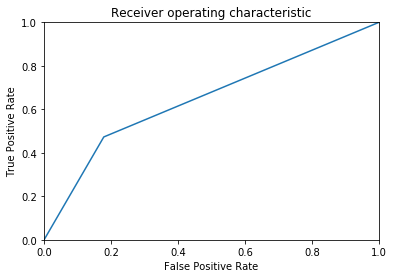

In [202]:
fpr,tpr, _ = roc_curve(ytest,y_predict_gb)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.